In [3]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
#nltk.download('stopwords') for downloading first time uncomment this one

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [5]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
df.shape

(5572, 5)

In [7]:
#drop unnecessary columns 
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.columns=['label','text'] #renaming columns
df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

<h3> class labels</h3>

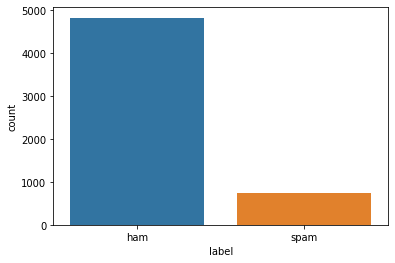

In [9]:
sns.countplot(x='label',data=df)

In [10]:
df['label']=df.replace({'ham':0,'spam':1}) #you can also use other techniques

In [11]:
df.head()

label                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...

<h2> Data Preprocessing</h2>

In [12]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i]) #removing useless symbols except alphabets
    review = review.lower() #lowering the text
    review = review.split() #splitting the text
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [15]:
y=df.label
y=y.astype('int') #converting into int type

<h2> Model Creation </h2>


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)

In [19]:
print("accuracy score:",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


accuracy score: 0.9874439461883409
[[943   8]
 [  6 158]]


## Under Sampling

In [22]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res,y_res = nm.fit_sample(x,y)


In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4825, 1: 747})
Resampled dataset shape Counter({0: 747, 1: 747})


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("accuracy score:",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


accuracy score: 0.8896321070234113
[[122   4]
 [ 29 144]]


<h3>Random Under sampler</h3>

In [24]:
from imblearn.under_sampling import RandomUnderSampler
ous=RandomUnderSampler(random_state=42)
x_res,y_res = ous.fit_sample(x,y)


In [25]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4825, 1: 747})
Resampled dataset shape Counter({0: 747, 1: 747})


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)


In [27]:
print("accuracy score:",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

accuracy score: 0.9464882943143813
[[141   6]
 [ 10 142]]


# over sampling

 ### Randomoversampler

In [43]:
from imblearn.over_sampling import RandomOverSampler
ovs=RandomOverSampler(random_state=42)
x_res,y_res = ovs.fit_sample(x,y)


In [44]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4825, 1: 747})
Resampled dataset shape Counter({0: 4825, 1: 4825})


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)


In [46]:
print("accuracy score:",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


accuracy score: 0.9751295336787564
[[912  24]
 [ 24 970]]


## SMOTETomek

In [47]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
x_res,y_res = smk.fit_sample(x,y)

In [48]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4825, 1: 747})
Resampled dataset shape Counter({0: 4823, 1: 4823})


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)

In [50]:
print("accuracy score:",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


accuracy score: 0.9025906735751296
[[927 166]
 [ 22 815]]
